In [ ]:
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss
import numpy as np
out = torch.Tensor(np.array([[
    [
        [1.,1, 1], 
        [0, 0, 0], 
        [0, 0, 0],
        [0, 0, 0]
    ],
    [
        [0, 0, 0],
        [1, 1, 1],
        [0, 0.,0],
        [0, 0, 0]
    ],
    [
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1],
        [0, 0, 0]
    ],
    [
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]
    ]
]]))

target = torch.Tensor([[
    [0, 0, 0],
    [1, 1, 1],
    [2, 2, 2],
    [3, 3, 3]
]]).type('torch.LongTensor')
criterion = CrossEntropyLoss()


In [ ]:
print(out.shape)
print(target.shape)
print(criterion(out, target))
values, indices = torch.max(out, dim=1)
print(values, indices)
print(indices.shape)


In [ ]:
sm = nn.Softmax(dim=1)
print(sm(out))

In [ ]:
print(torch.log(sm(out)))

In [ ]:
loss = nn.NLLLoss()
print(loss(torch.log(sm(out)), target))

In [ ]:
print(np.zeros(4))

In [1]:
from config import get_cfg
from op import Operation

cfg = get_cfg()

operation = Operation(cfg)


2020-03-13 19:35:19,917 - /home/zhengtao/Segmentation/BrainSeg/config.py[line:70] - INFO: config:
exp_dir: ./exp
epochs: 512
lr: 0.001
weight_decay: 0.0005
momentum: 0.9
epsilon: 1e-08
dropout: False
data_name: brains18
choose_class: 4
n_classes: 9
batch_size: 10
num_workers: 8
folders: ['1', '5', '7', '4', '148', '070', '14']
val_folds: ['1']
train_folds: ['5', '7', '4', '148', '070', '14']
memory_gpu: [1067, 601, 11168, 2879, 4613, 4613, 2879, 3869]
device: cuda:2
cur_dir: ./exp/brains18=0313-193514
model_path: ./exp/brains18=0313-193514/model.pt
log_path: ./exp/brains18=0313-193514/exp.log
log: <Logger ./exp/brains18=0313-193514/exp.log (DEBUG)>

2020-03-13 19:35:21,532 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:56] - CRITICAL: criterion: 
CrossEntropyLoss()
2020-03-13 19:35:21,533 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:57] - CRITICAL: optimizer: 
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0005
)

In [3]:
operation.load(path='./exp/brains18=0313-184237/model.pt')

2020-03-13 19:35:54,831 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:63] - INFO: Model loaded from ./exp/brains18=0313-184237/model.pt


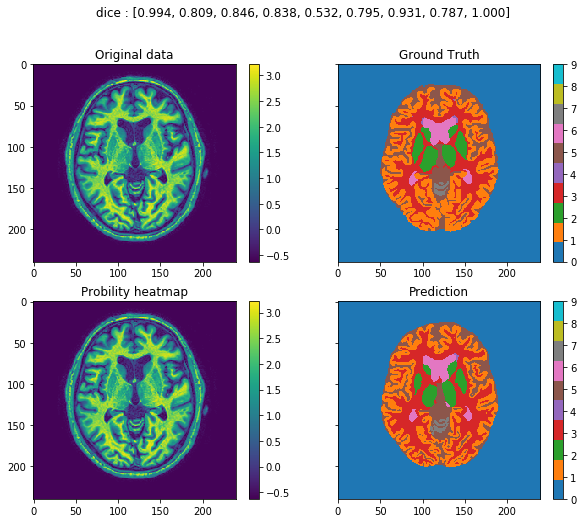

In [11]:
def show_result(data, ids):
    for i in ids:
        operation.predict(data[i][2], data[i][3])
show_result(operation.val_data, [20])